In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Сначала загрузим данные.

In [2]:
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')

Теперь посмотрим на них.

In [3]:
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [4]:
orders.isna().sum()

id             0
order_date     0
ship_mode      0
customer_id    0
sales          0
dtype: int64

In [5]:
orders.drop_duplicates(inplace=True)

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5009 non-null   int64  
 1   order_date   5009 non-null   object 
 2   ship_mode    5009 non-null   object 
 3   customer_id  5009 non-null   object 
 4   sales        5009 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 234.8+ KB


In [7]:
customers

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,Pennsylvania,Philadelphia
789,RS-19870,Roy Skaria,Home Office,Iowa,Burlington
790,SC-20845,Sung Chung,Consumer,Illinois,Arlington Heights
791,RE-19405,Ricardo Emerson,Consumer,Ohio,Kent


In [8]:
customers.isna().sum()

id         0
name       0
segment    0
state      0
city       0
dtype: int64

In [9]:
customers.drop_duplicates(inplace=True)

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       793 non-null    object
 1   name     793 non-null    object
 2   segment  793 non-null    object
 3   state    793 non-null    object
 4   city     793 non-null    object
dtypes: object(5)
memory usage: 37.2+ KB


In [11]:
(orders.sales == 0).sum()

0

In [12]:
orders.order_date = pd.to_datetime(orders.order_date, infer_datetime_format=True)

Данные готовы к обработке.

In [13]:
orders['InvoiceMonth'] = orders.order_date.dt.strftime('%Y-%m')

In [14]:
data = pd.merge(orders, customers, how='left', left_on='customer_id', right_on='id')
data.drop(columns=['id_y'], inplace=True)
data.rename(columns={'id_x': 'id'}, inplace=True)
data

,id,order_date,ship_mode,customer_id,sales,InvoiceMonth,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,Dennis Kane,Consumer,Ohio,Marion
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,Ed Braxton,Corporate,Ohio,Akron
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,Neil Franzosisch,Home Office,Illinois,Rockford
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,Jasper Cacioppo,Consumer,California,Los Angeles
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,Jim Mitchum,Corporate,New Jersey,Bridgeton
...,...,...,...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,2017-11,Jack O'Briant,Corporate,Pennsylvania,Philadelphia
5005,169320,2017-07-23,Second,LH-16900,171.430,2017-07,Lena Hernandez,Consumer,Delaware,Dover
5006,169488,2017-09-07,First,AA-10375,56.860,2017-09,Allen Armold,Consumer,Arizona,Mesa
5007,169502,2017-08-28,Standard,MG-17650,113.410,2017-08,Matthew Grinstein,Home Office,Pennsylvania,Philadelphia


In [15]:
cohorts = data.groupby('customer_id', as_index=False)['InvoiceMonth'].min()
cohorts.rename(columns={'InvoiceMonth': 'Cohort'}, inplace=True)
cohorts.head()

,customer_id,Cohort
0,AA-10315,2014-03
1,AA-10375,2014-04
2,AA-10480,2014-05
3,AA-10645,2014-06
4,AB-10015,2014-02


In [16]:
data = pd.merge(data, cohorts, how='left', on='customer_id')
data.head()

,id,order_date,ship_mode,customer_id,sales,InvoiceMonth,name,segment,state,city,Cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,Dennis Kane,Consumer,Ohio,Marion,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,Ed Braxton,Corporate,Ohio,Akron,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,Neil Franzosisch,Home Office,Illinois,Rockford,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,Jasper Cacioppo,Consumer,California,Los Angeles,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,Jim Mitchum,Corporate,New Jersey,Bridgeton,2014-04


In [17]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [18]:
cohorts_group = data.groupby(['Cohort', 'InvoiceMonth']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
cohorts_group.head()

InvoiceMonth  TotalUsers
Cohort  CohortPeriod                         
2014-01 0                 2014-01          32
        1                 2014-02           3
        2                 2014-04           2
        3                 2014-05           2
        4                 2014-07           2

In [19]:
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
# user_retention.T

<AxesSubplot:title={'center':'Cohorts: User Retention for the whole period'}, xlabel='CohortPeriod', ylabel='Cohort'>

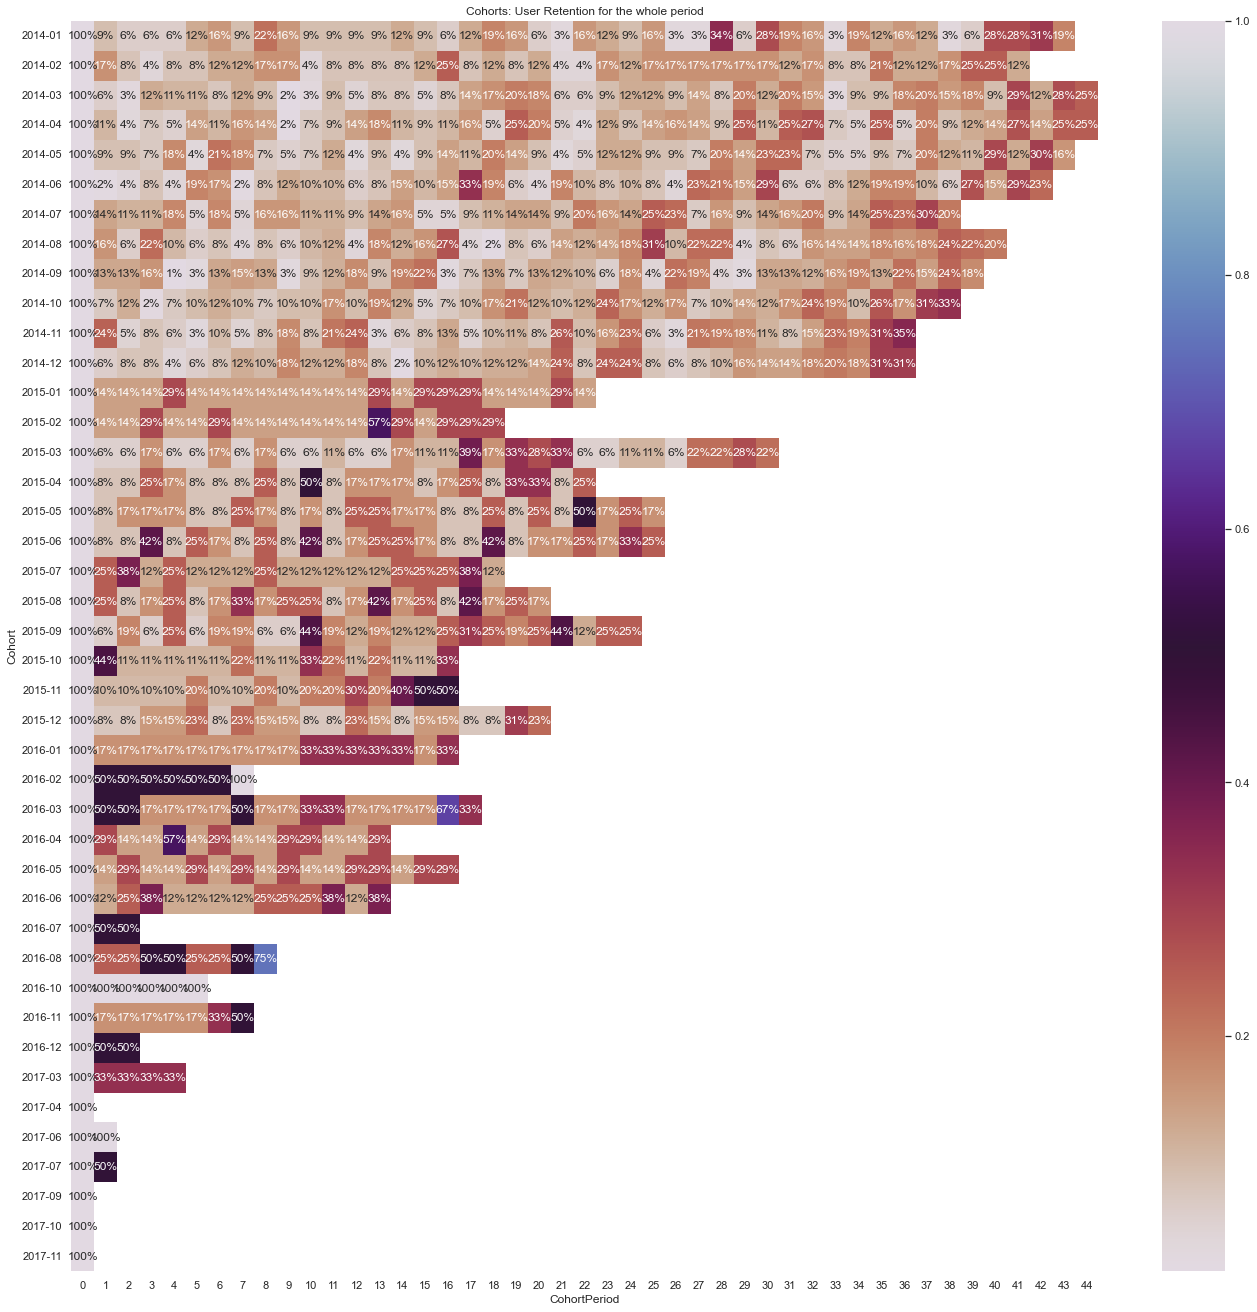

In [20]:
sns.set(style='white')
plt.figure(figsize=(23, 23))
plt.title('Cohorts: User Retention for the whole period')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', cmap='twilight_r')

Посмотрим на первые два года (2014-2015) и последние (2016-2017) по отдельности.

In [21]:
cohorts_group = data[data.InvoiceMonth < '2016-01'].groupby(['Cohort', 'InvoiceMonth']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

<AxesSubplot:title={'center':'Cohorts: User Retention 2014-2015'}, xlabel='CohortPeriod', ylabel='Cohort'>

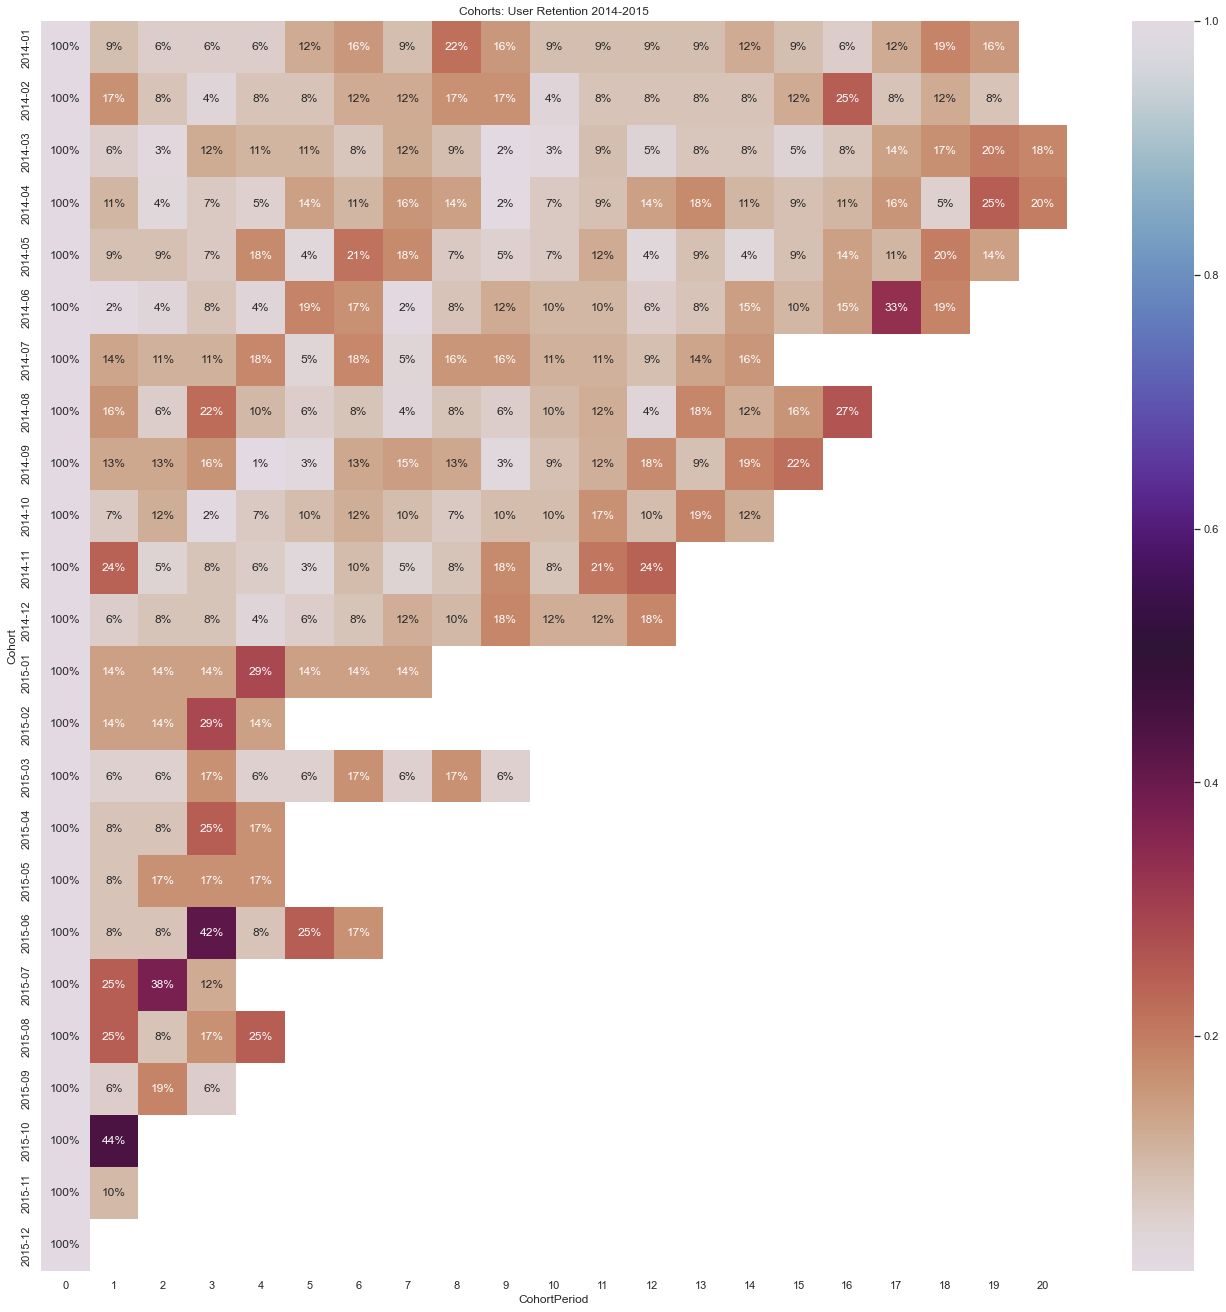

In [22]:
sns.set(style='white')
plt.figure(figsize=(23, 23))
plt.title('Cohorts: User Retention 2014-2015')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', cmap='twilight_r')

In [23]:
cohorts_group = data[(data.InvoiceMonth >= '2016-01') & (data.Cohort >= '2016-01')].groupby(['Cohort', 'InvoiceMonth']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

<AxesSubplot:title={'center':'Cohorts: User Retention 2016-2017'}, xlabel='CohortPeriod', ylabel='Cohort'>

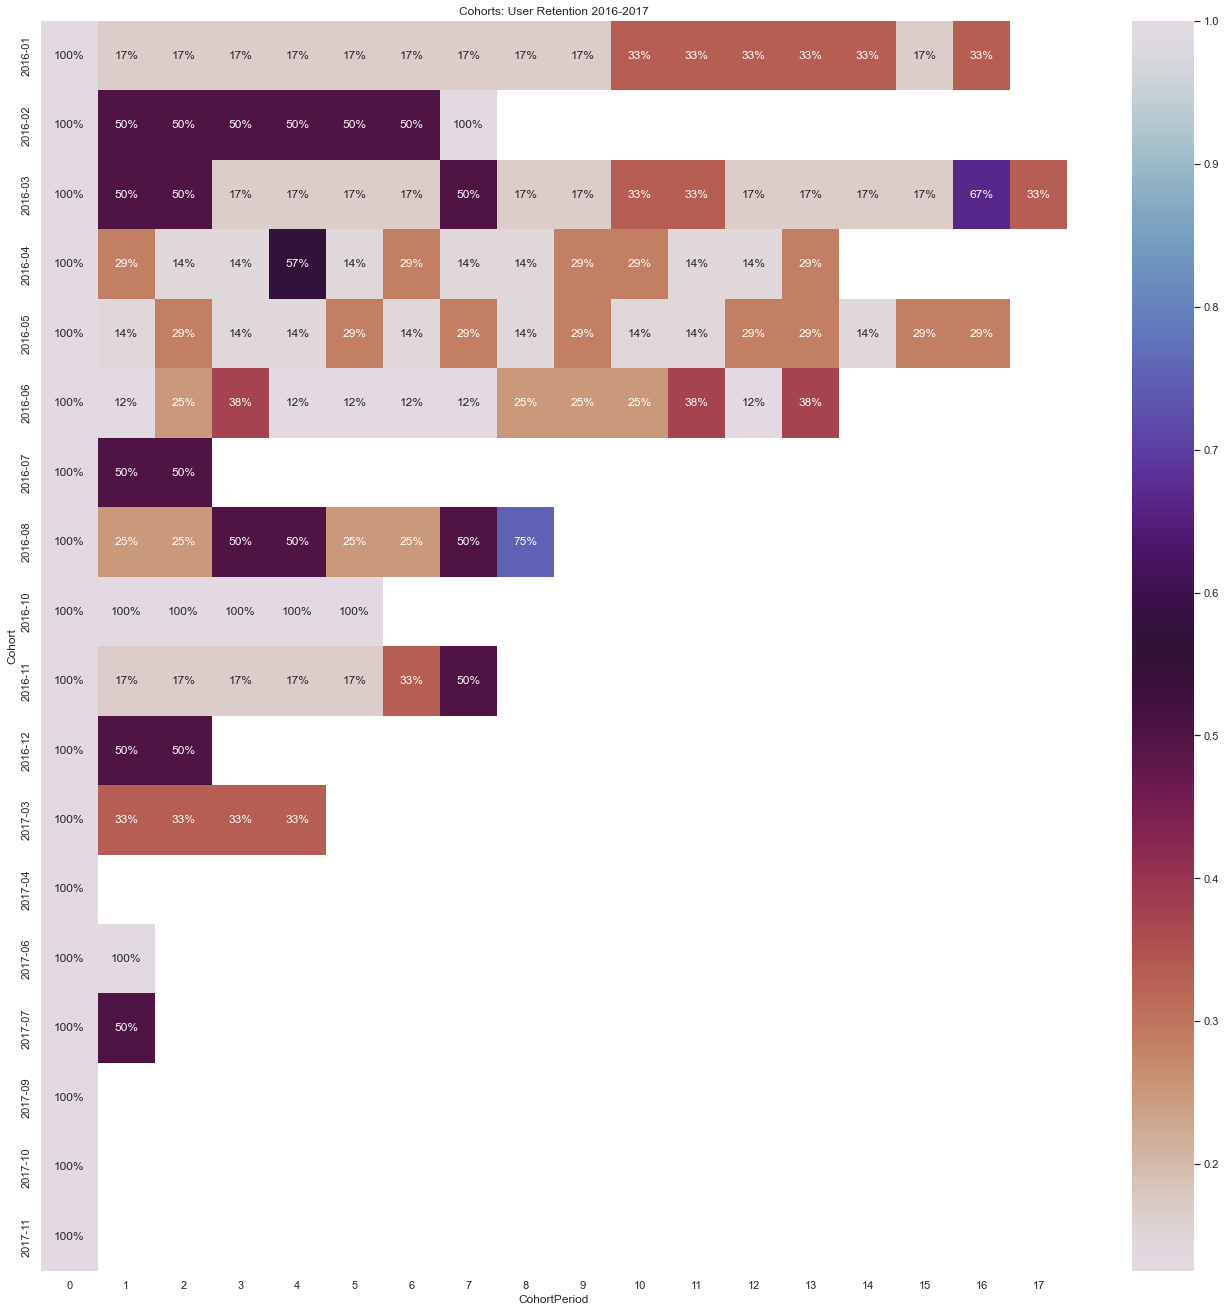

In [24]:
sns.set(style='white')
plt.figure(figsize=(23, 23))
plt.title('Cohorts: User Retention 2016-2017')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', cmap='twilight_r')

Как можем видеть, со временем коэффициент удержания возрастает, то есть как такого оттока клиентов нет. Хотя если смотреть на данные за последние два года (2016-2017), то можно видеть пропуски, то есть из-за неполноты картины могут быть искажения результатов, и на самом деле всё обстоит иначе (вопрос к данным, стоит иметь полный датасет). Если смотреть на график когорт всего периода, то можем видеть, что у самых ранних клиентов сезонно под конец года повышается приток пользователей, но тем не менее, под конец периода (16-17 года) видно, что даже у них происходит увеличение, но уже не сезонно, а вполне равномерно и с большей отдачей. Следовательно, можно сделать вывод о том, что изменения в бизнесе в последний год принесли положительные результаты, а не наоборот.